In [1]:
import numpy as np

In [7]:
def calculate_costs(size, distance_metric='L1'):
    """
    This function of an array or image and calculates the cost from it to itself.

    Parameters:
    - `size` (int or tuple): representing the object on which we would like to calculate costs.

    Returns:
    - `costs` (numpy.ndarray): A 2D array representing the matrix of costs of transporting pixels
                                from the first image to the second image.
    """

    # Helper function for L1 and L2 distance
    if distance_metric == 'L1':
        dist = lambda a, b: abs(a - b)
    elif distance_metric == 'L2':
        dist = lambda a, b: (a - b) ** 2
    else:
        raise ValueError('Invalid distance metric. Must be either "L1" or "L2".')

    # 1D case:
    if isinstance(size, int):
        X = np.linspace(0, 1, size)
        costs = np.zeros([size, size], np.float64)

        for it1 in range(size):
            for it2 in range(size):
                costs[it1, it2] = dist(X[it1], X[it2])

        return costs

    # 2D case:
    elif len(size) == 2:
        I, J = np.indices(size)
        
        # Flatten the indices to create 1D arrays of x and y coordinates
        I_flat = I.flatten()
        J_flat = J.flatten()
        
        # Calculate distances using broadcasting
        if distance_metric == 'L1':
            costs = np.sqrt((I_flat[:, None] - I_flat[None, :]) ** 2 + (J_flat[:, None] - J_flat[None, :]) ** 2)
        elif distance_metric == 'L2':
            costs = (I_flat[:, None] - I_flat[None, :]) ** 2 + (J_flat[:, None] - J_flat[None, :]) ** 2
        else:
            raise ValueError('Invalid distance metric. Must be either "L1" or "L2".')

        return costs

In [3]:
def CostMatrixW1(dim):
    cm = np.zeros((dim*dim,dim*dim))
    for i in range(dim):
        for j in range(dim):
            for v in range(dim):
                for w in range(dim):
                    cm[(i*dim+j),(v*dim+w)]=np.sqrt((i-v)**2+(j-w)**2)
                    
    return(cm)


def CostMatrixW2(dim):
    cm = np.zeros((dim*dim,dim*dim))
    for i in range(dim):
        for j in range(dim):
            for v in range(dim):
                for w in range(dim):
                    cm[(i*dim+j),(v*dim+w)]=((i-v)**2+(j-w)**2)
                    
    return(cm)

In [8]:
res_e = calculate_costs((32,32), 'L1')
res_a = CostMatrixW1(32)

In [9]:
diff = np.sum(np.abs(res_e - res_a))
print(diff)

0.0


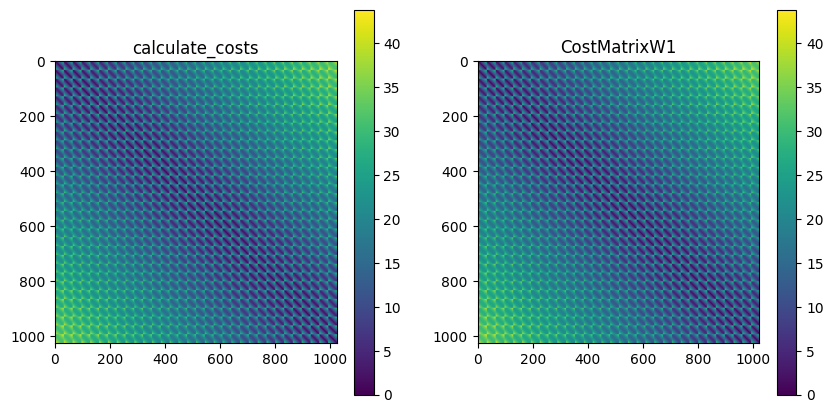

In [10]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(res_e, cmap='viridis')
plt.title('calculate_costs')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(res_a, cmap='viridis')
plt.title('CostMatrixW1')
plt.colorbar()

plt.show()

In [11]:
res_e = calculate_costs((32,32), 'L2')
res_a = CostMatrixW2(32)

In [12]:
diff = np.sum(np.abs(res_e - res_a))
print(diff)

0.0
